In [ ]:
!mkdir /root/.kaggle
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c playground-series-s4e4

  0% 0.00/2.41M [00:00<?, ?B/s]
100% 2.41M/2.41M [00:00<00:00, 127MB/s]


In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from ucimlrepo import fetch_ucirepo

abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

rest_data = pd.concat([X,y],axis=1)

In [ ]:
rest_data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
!unzip playground-series-s4e4.zip

Archive:  playground-series-s4e4.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
id = test["id"]

In [ ]:
train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)

In [ ]:
rest_data.columns = train.columns

In [ ]:
train = pd.concat([train,rest_data],axis=0)

In [ ]:
train["Sex"] = train["Sex"].astype("category").cat.codes
test["Sex"] = test["Sex"].astype("category").cat.codes

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor,Pool

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(train.drop(columns=["Rings"]),train["Rings"],test_size=0.2)

In [ ]:
train_pool = Pool(x_train,y_train)
test_pool = Pool(x_test,y_test)

In [ ]:
model = CatBoostRegressor(verbose=False)

In [ ]:
grid = {'learning_rate': [0.03, 0.05,0.01,0.02],
        'depth': [3,4, 6, 10,12],
        'l2_leaf_reg': [1, 3, 5, 7, 9,6],
        'iterations':[100,300,500,700,800]}

In [ ]:
randomized_search_result = model.randomized_search(grid,
                                                   cv=5,
                                                   n_iter=20,
                                                   X=x_train,
                                                   y=y_train,
                                                   plot=True,verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 1.883371356
bestIteration = 698


bestTest = 1.899185066
bestIteration = 699


bestTest = 1.964653818
bestIteration = 799


bestTest = 1.894238964
bestIteration = 799


bestTest = 2.531616065
bestIteration = 99


bestTest = 2.532754182
bestIteration = 99


bestTest = 1.902210886
bestIteration = 699


bestTest = 1.880878892
bestIteration = 799


bestTest = 1.865667197
bestIteration = 499


bestTest = 2.026685234
bestIteration = 99


bestTest = 4.256768912
bestIteration = 99


bestTest = 2.026581972
bestIteration = 299


bestTest = 1.906625816
bestIteration = 299


bestTest = 1.85915102
bestIteration = 699


bestTest = 1.888429515
bestIteration = 799


bestTest = 1.889379766
bestIteration = 799


bestTest = 1.853306847
bestIteration = 798


bestTest = 1.910640185
bestIteration = 99


bestTest = 2.431480399
bestIteration = 99


bestTest = 1.869171959
bestIteration = 299

Training on fold [0/5]

bestTest = 1.865933076
bestIteration = 790

Training on fold [1/5]

bestTest = 1.87

In [ ]:
model.fit(train_pool,eval_set=test_pool,verbose=False)

In [ ]:
meta_data = model.get_metadata()

In [ ]:
for i in meta_data:
  print(i)

catboost_version_info
train_finish_time
output_options
training
model_guid
params


In [ ]:
import json

In [ ]:
history = json.loads(meta_data["training"])

In [ ]:
history

{'metrics': {'learn_best_error': {'RMSE': 1.6971926203470864},
  'test_metrics_history': [],
  'learn_metrics_history': [{'RMSE': 3.0921762354269413},
   {'RMSE': 3.014258790469482},
   {'RMSE': 2.9393054580535596},
   {'RMSE': 2.8699549843419283},
   {'RMSE': 2.802394669394124},
   {'RMSE': 2.741119482645711},
   {'RMSE': 2.685949965434351},
   {'RMSE': 2.6322059692365816},
   {'RMSE': 2.582162221682958},
   {'RMSE': 2.536000299101559},
   {'RMSE': 2.4938397806743304},
   {'RMSE': 2.4549667662315855},
   {'RMSE': 2.4186141566800528},
   {'RMSE': 2.382915561369849},
   {'RMSE': 2.351020941837974},
   {'RMSE': 2.3217440057808134},
   {'RMSE': 2.2951578819809053},
   {'RMSE': 2.2695553877103833},
   {'RMSE': 2.246161125051088},
   {'RMSE': 2.2243103387284577},
   {'RMSE': 2.2040749132570614},
   {'RMSE': 2.185233119501826},
   {'RMSE': 2.1666989893335864},
   {'RMSE': 2.1504050607802547},
   {'RMSE': 2.135356559286736},
   {'RMSE': 2.1214909937179174},
   {'RMSE': 2.1083455341694473},
  

In [ ]:
hist = {"loss":[]}#,"val_loss":[]}
for item in history["metrics"]["learn_metrics_history"]:
  hist["loss"].append(item["RMSE"])
# for item in history["metrics"]["test_metrics_history"]:
#   hist["val_loss"].append(item[0]["RMSE"])
hist = pd.DataFrame(hist)

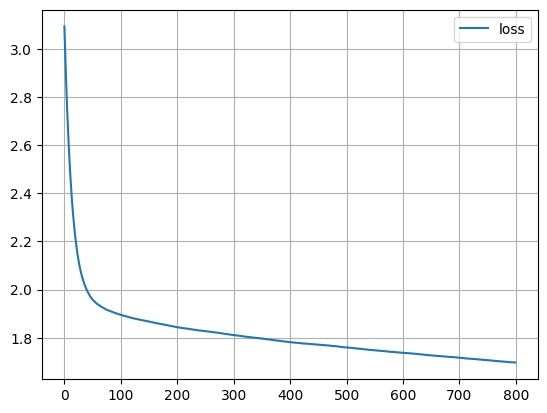

In [ ]:
plt.plot(hist["loss"],label="loss")
#plt.plot(hist["val_loss"],label="val_loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
mean_squared_log_error(y_test,prediction)

0.02311982982174171

In [ ]:
pred = model.predict(test)

In [ ]:
pred = pred.reshape(60411)

In [ ]:
df = pd.DataFrame({"id":id,"Rings":pred})

In [ ]:
df

,id,Rings
0,90615,9.696392
1,90616,9.689732
2,90617,10.119054
3,90618,10.410742
4,90619,7.754605
...,...,...
60406,151021,6.633828
60407,151022,9.433919
60408,151023,12.342366
60409,151024,13.738859


In [ ]:
df.to_csv("submission.csv",index=False)

In [ ]:
!kaggle competitions submit -c playground-series-s4e4 -f submission.csv -m "first submission"

100% 1.45M/1.45M [00:00<00:00, 1.82MB/s]
Successfully submitted to Regression with an Abalone Dataset

In [ ]:
# final score 0.14832 rank 1251/2500